In [138]:
import numpy as np
import pandas as pd
import geopandas as gpd
import seaborn as sns
import matplotlib.pyplot as plt
import glob
import os
import shutil
import math
from numpy.linalg import norm
import pyproj

# load rupture data

In [139]:
# Replace 'data_FDHI.xlsx' with the actual path to your Excel file
file_path = 'FDHI_data/data_FDHI.xlsx'

# Load the Excel file into a DataFrame
df = pd.read_excel(file_path)

california_rows = df[df['region'] == 'California']

# Assuming you have the 'california_rows' DataFrame
unique_eq_names = california_rows['eq_name'].unique()


In [140]:
unique_eq_names

array(['Landers', 'HectorMine', 'Borrego', 'Imperial1979',
       'SuperstitionHills', 'Napa', 'Parkfield2004', 'SanFernando',
       'Imperial1940', 'Parkfield1966', 'GalwayLake', 'Kern',
       'ChalfantValley', 'OwensValley', 'Ridgecrest1', 'Ridgecrest2',
       'ElmoreRanch'], dtype=object)

In [141]:
# Define the source and destination directories
source_directory = 'A08_FDHI_Event_KMZ_20220719'
destination_directory = 'ECS_lines'

# Ensure the destination directory exists
if not os.path.exists(destination_directory):
    os.makedirs(destination_directory)

# Iterate through the files in the source directory
for filename in os.listdir(source_directory):
    source_file = os.path.join(source_directory, filename)
    
    # Check if the file is not a .kmz file
    if not filename.endswith('.kmz'):
        # Move the file to the destination directory
        destination_file = os.path.join(destination_directory, filename)
        shutil.move(source_file, destination_file)
        print(f"Moved: {filename} to {destination_directory}")


In [142]:
# # Define the source and destination directories
# source_directory = 'ECS_lines'
# destination_directory = 'ECS_lines_CA'

# # Ensure the destination directory exists
# if not os.path.exists(destination_directory):
#     os.makedirs(destination_directory)

# # Iterate through the unique_eq_names
# for eq_name in unique_eq_names:

#     # Iterate through the files in the source directory
#     for filename in os.listdir(source_directory):
#         source_file = os.path.join(source_directory, filename)
        
#         # Check if the eq_name is part of the filename
#         if eq_name in filename:
#             # Move the file to the destination directory
#             destination_file = os.path.join(destination_directory, filename)
#             shutil.move(source_file, destination_file)

### load ECS shapefiles showing general fault orientation

In [143]:
# # Define the directory where the shapefiles are located
# shapefile_directory = 'ECS_lines_CA'

# # Find all shapefiles in the directory
# shapefile_paths = glob.glob(os.path.join(shapefile_directory, '*.shp'))


# # Iterate through each shapefile and read it
# for shapefile_path in shapefile_paths:
#     plt.figure()
#     gdf = gpd.read_file(shapefile_path)
#     gdf.plot()
#     plt.title(shapefile_path)


In [144]:
event_data = pd.read_excel('FDHI_data/event_data.xlsx')
CA_event_data = event_data[event_data['event'].isin(unique_eq_names)]


In [145]:
# # Directory containing the shapefiles
# plt.rcParams['font.size'] = 10

# shapefile_directory = "ECS_lines_CA/"
# CA_event_data['Zone_numeric'] = CA_event_data['zone'].str[:-1]

# # Get a list of all shapefile paths in the directory
# shapefile_paths = [os.path.join(shapefile_directory, file) for file in os.listdir(shapefile_directory) if file.endswith('.shp')]

# for i, shapefile_path in enumerate(shapefile_paths):
#     parts = shapefile_path.rsplit('/', 1)
#     partsb = parts[1]
#     partsb = str(partsb)
#     split_parts = partsb.split('_ECS.shp')
#     eventname = split_parts[0]
#     matching_rows = CA_event_data[CA_event_data['event'] == eventname]
#     target_utm_zone = matching_rows['Zone_numeric'].to_numpy()
#     target_utm_zone = int(target_utm_zone[0])

#     plt.figure()
#     gdf = gpd.read_file(shapefile_path)
#     gdf = gdf.set_crs('EPSG:4326')
#     utm_crs = f"+proj=utm +zone={target_utm_zone} +ellps=WGS84 +datum=WGS84 +units=m +no_defs"
#     gdf_utm = gdf.to_crs(utm_crs)
#     gdf_utm.plot()
#     plt.title(eventname)


# load stress data

In [146]:
# Specify the number of rows to skip
skip_rows = 47

# Load the CSV file into a DataFrame
stress_data = pd.read_csv("SCEC_CSM_archive_2023/Hardebeck_FM.csv", skiprows=skip_rows)
print(stress_data.head())

        LON      LAT  DEP       See       Sen       Seu      Snn       Snu  \
0 -121.6443  35.5935    1  0.360272 -0.199077  0.101716 -0.51401 -0.032786   
1 -121.6443  35.5935    3  0.360272 -0.199077  0.101716 -0.51401 -0.032786   
2 -121.6443  35.5935    5  0.360272 -0.199077  0.101716 -0.51401 -0.032786   
3 -121.6443  35.5935    7  0.360272 -0.199077  0.101716 -0.51401 -0.032786   
4 -121.6443  35.5935    9  0.360272 -0.199077  0.101716 -0.51401 -0.032786   

        Suu   SHmax  ...    V2z   V3x    V3y    V3z    V1pl    V2pl   V3pl  \
0  0.153738  12.242  ...  0.938  0.21  0.977  0.015  20.218  69.763  0.858   
1  0.153738  12.242  ...  0.938  0.21  0.977  0.015  20.218  69.763  0.858   
2  0.153738  12.242  ...  0.938  0.21  0.977  0.015  20.218  69.763  0.858   
3  0.153738  12.242  ...  0.938  0.21  0.977  0.015  20.218  69.763  0.858   
4  0.153738  12.242  ...  0.938  0.21  0.977  0.015  20.218  69.763  0.858   

     V1azi  V2azi    V3azi  
0  282.463  99.82  192.147  
1  2

In [147]:
# subset stress at depth slice of choice
depth_choice = 5
stress_data_depthslice = stress_data[stress_data['DEP'] == depth_choice]
print(stress_data_depthslice.head())

         LON      LAT  DEP       See       Sen       Seu      Snn       Snu  \
2  -121.6443  35.5935    5  0.360272 -0.199077  0.101716 -0.51401 -0.032786   
15 -121.6443  35.6115    5  0.360272 -0.199077  0.101716 -0.51401 -0.032786   
28 -121.6443  35.6295    5  0.360272 -0.199077  0.101716 -0.51401 -0.032786   
41 -121.6443  35.6475    5  0.360272 -0.199077  0.101716 -0.51401 -0.032786   
54 -121.6443  35.6655    5  0.360272 -0.199077  0.101716 -0.51401 -0.032786   

         Suu   SHmax  ...    V2z   V3x    V3y    V3z    V1pl    V2pl   V3pl  \
2   0.153738  12.242  ...  0.938  0.21  0.977  0.015  20.218  69.763  0.858   
15  0.153738  12.242  ...  0.938  0.21  0.977  0.015  20.218  69.763  0.858   
28  0.153738  12.242  ...  0.938  0.21  0.977  0.015  20.218  69.763  0.858   
41  0.153738  12.242  ...  0.938  0.21  0.977  0.015  20.218  69.763  0.858   
54  0.153738  12.242  ...  0.938  0.21  0.977  0.015  20.218  69.763  0.858   

      V1azi  V2azi    V3azi  
2   282.463  99.82  

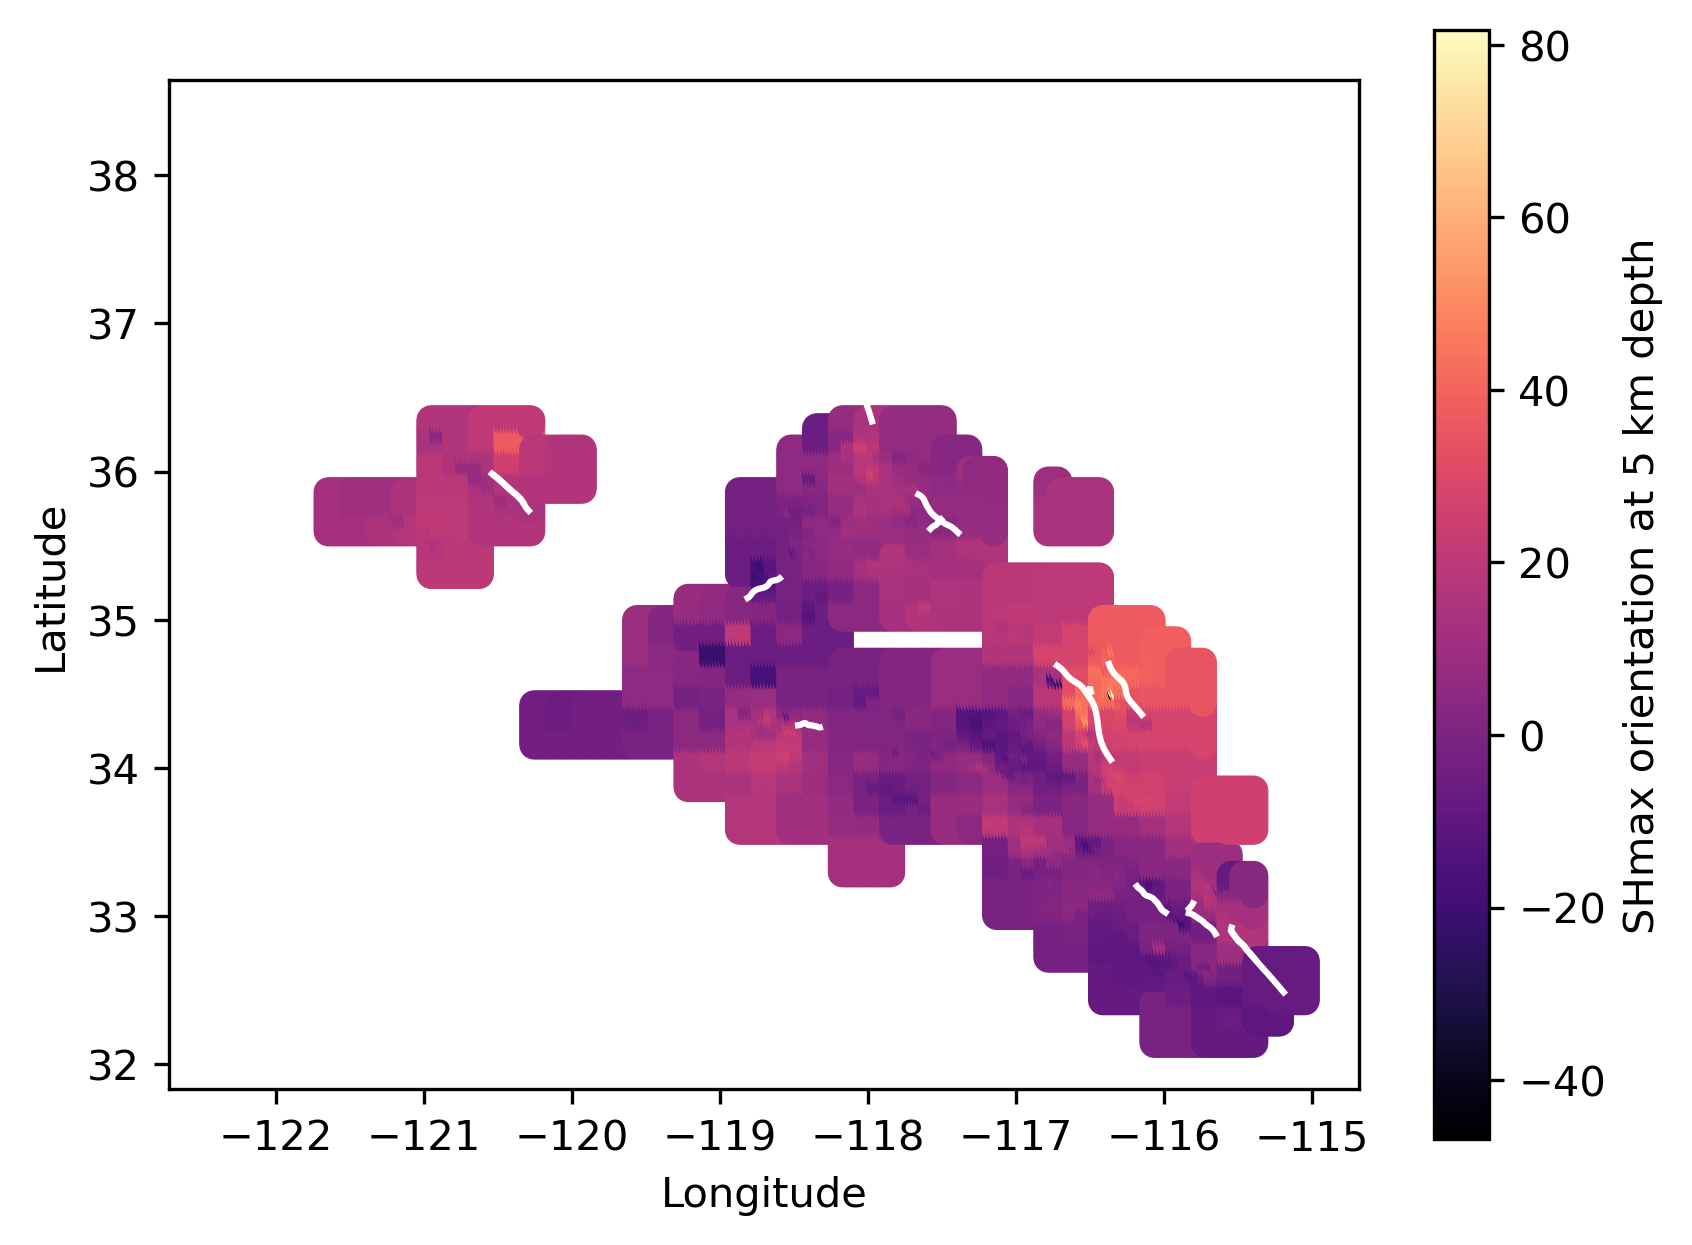

In [148]:
# Assuming 'stress_data_depthslice' is your DataFrame
xstress = stress_data_depthslice['LON']
ystress = stress_data_depthslice['LAT']
SHmax = stress_data_depthslice['SHmax']

plt.figure(dpi=300)
# Create a scatter plot with color based on 'SHmax'
plt.scatter(xstress, ystress, c=SHmax, cmap='magma', marker='o')

# Add colorbar for reference
plt.colorbar(label='SHmax orientation at 5 km depth')

# Set axis labels and title
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Define the directory where the shapefiles are located
shapefile_directory = 'ECS_lines_CA'

# Find all shapefiles in the directory
shapefile_paths = glob.glob(os.path.join(shapefile_directory, '*.shp'))

# Iterate through each shapefile and read it
for shapefile_path in shapefile_paths:
    gdf = gpd.read_file(shapefile_path)
    gdf.plot(ax=plt.gca(), color='white')  # Specify the current axis using plt.gca()

plt.show()


###  Subdivide ruptures into evenly spaced points that capture the curvature

In [149]:
def dot(vA, vB):
    return vA[0]*vB[0]+vA[1]*vB[1]

def ang(lineA, lineB):
    # Get nicer vector form
    vA = [(lineA[0][0]-lineA[1][0]), (lineA[0][1]-lineA[1][1])]
    vB = [(lineB[0][0]-lineB[1][0]), (lineB[0][1]-lineB[1][1])]
    # Get dot prod
    dot_prod = dot(vA, vB)
    # Get magnitudes
    magA = dot(vA, vA)**0.5
    magB = dot(vB, vB)**0.5
    # Get cosine value
    cos_ = dot_prod/magA/magB
    # Get angle in radians and then convert to degrees
    angle = math.acos(dot_prod/magB/magA)
    # Basically doing angle <- angle mod 360
    ang_deg = math.degrees(angle)%360
    
    if ang_deg-180>=0:
        # As in if statement
        return 360 - ang_deg
    else: 
        
        return ang_deg


/var/folders/bw/pbfwt2p16s729kbshjt5y7900000gr/T/ipykernel_87435/1854210596.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CA_event_data['Zone_numeric'] = CA_event_data['zone'].str[:-1]


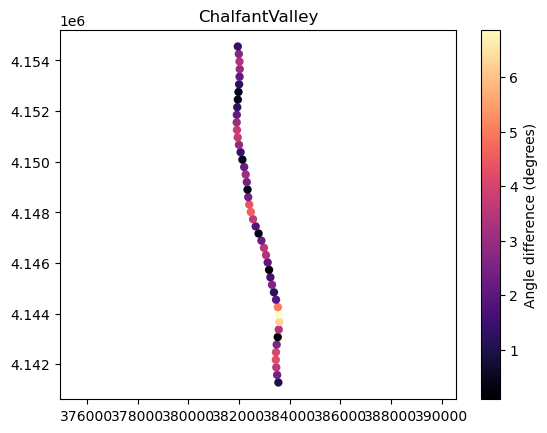

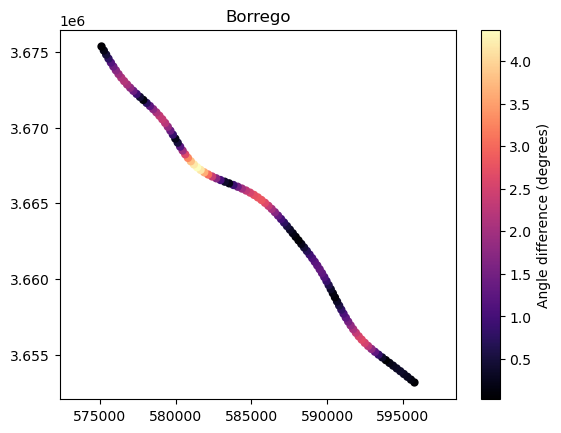

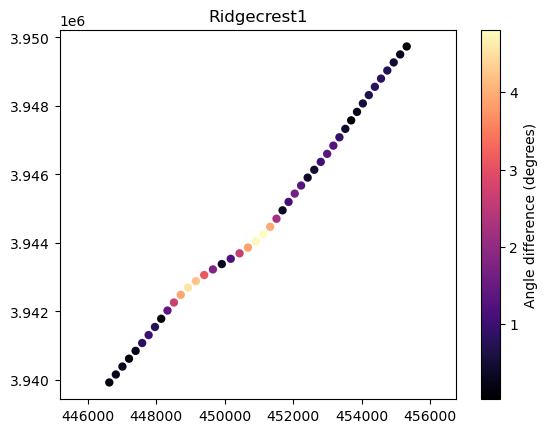

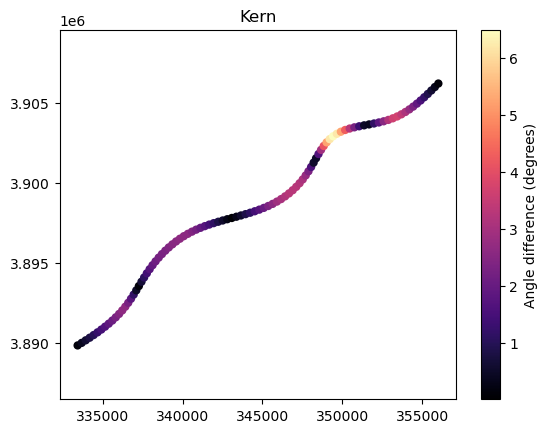

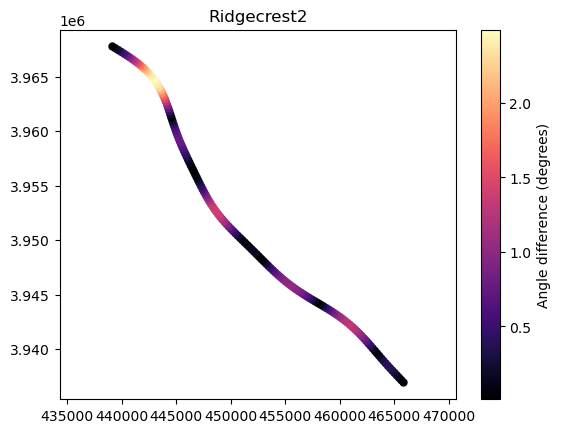

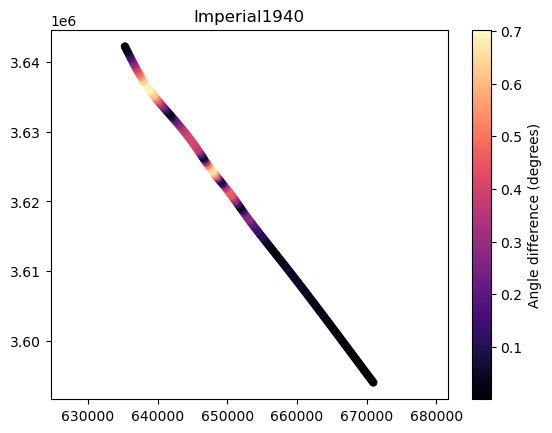

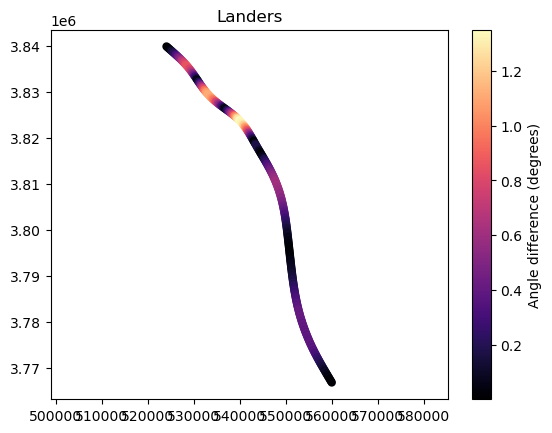

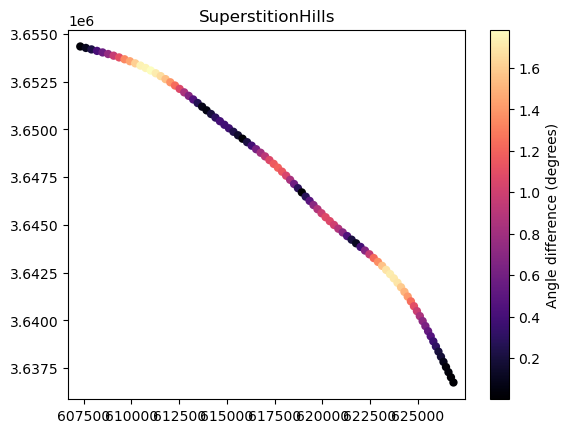

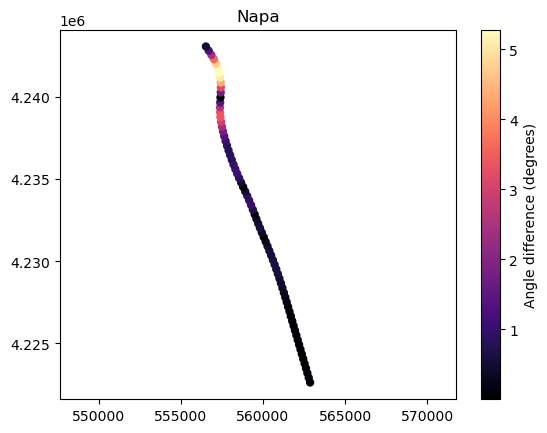

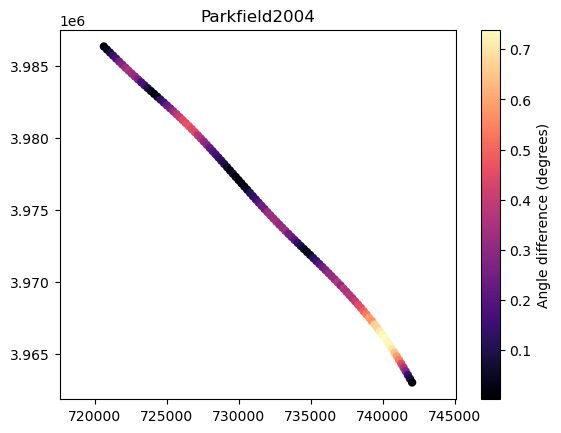

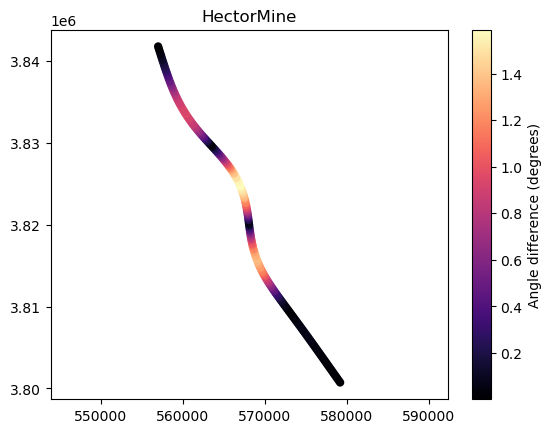

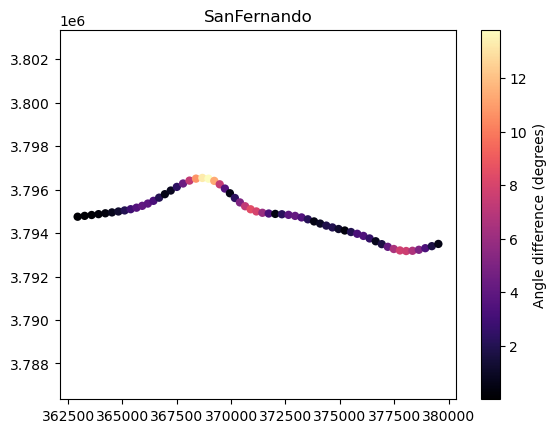

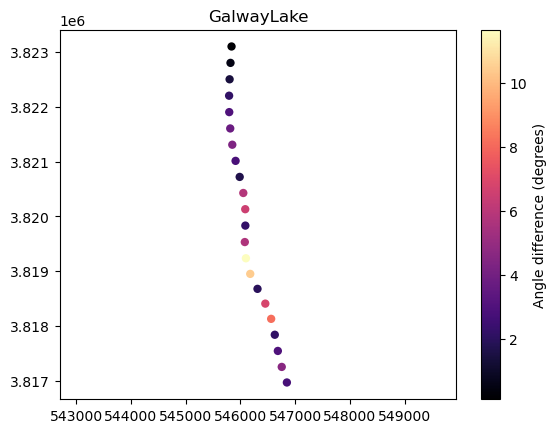

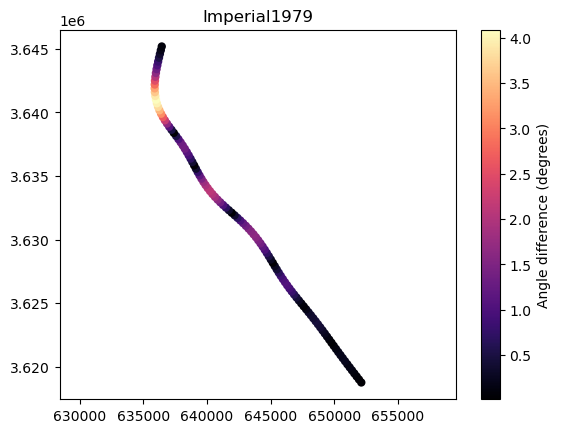

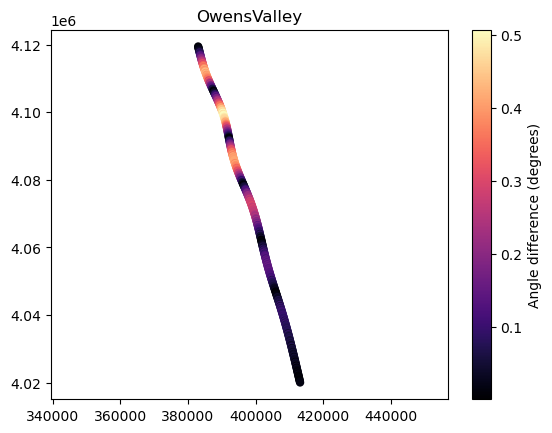

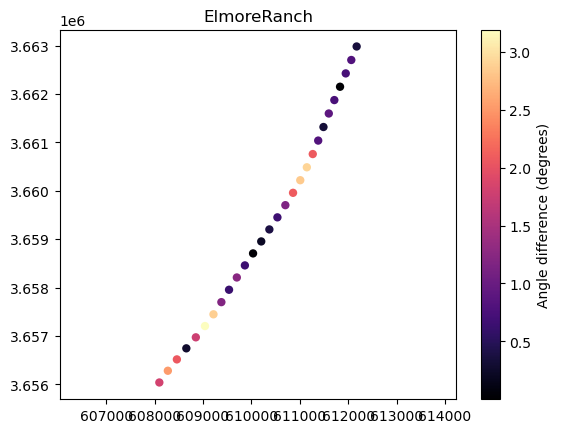

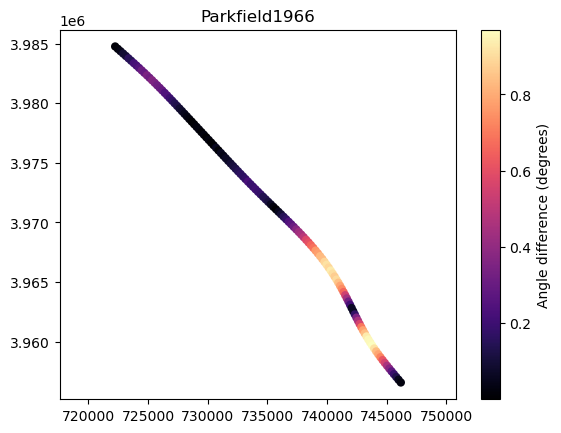

In [150]:

# Directory containing the shapefiles
shapefile_directory = "ECS_lines_CA/"

# Assuming 'CA_event_data' DataFrame contains event and zone information
CA_event_data['Zone_numeric'] = CA_event_data['zone'].str[:-1]

# Get a list of all shapefile paths in the directory
shapefile_paths = [os.path.join(shapefile_directory, file) for file in os.listdir(shapefile_directory) if file.endswith('.shp')]

for i, shapefile_path in enumerate(shapefile_paths):
    parts = shapefile_path.rsplit('/', 1)
    partsb = parts[1]
    partsb = str(partsb)
    split_parts = partsb.split('_ECS.shp')
    eventname = split_parts[0]
    matching_rows = CA_event_data[CA_event_data['event'] == eventname]
    target_utm_zone = matching_rows['Zone_numeric'].to_numpy()
    target_utm_zone = int(target_utm_zone[0])

    plt.figure()
    gdf = gpd.read_file(shapefile_path)
    gdf = gdf.set_crs('EPSG:4326')
    utm_crs = f"+proj=utm +zone={target_utm_zone} +ellps=WGS84 +datum=WGS84 +units=m +no_defs"
    gdf_utm = gdf.to_crs(utm_crs)
    
    # Extract the x and y coordinates from the 'geometry' column
    x_coords = []
    y_coords = []

    counter = 0
    step = 3 # for downsampling

    for line in gdf_utm['geometry']:
        for point in line.coords:
            x, y = point
            if counter % step == 0:
                # Only save every 5th point
                x_coords.append(x)
                y_coords.append(y)
            counter += 1

    angles = []
    for i in range(1,len(x_coords)-1):
        p0 = [x_coords[i-1], y_coords[i-1]]
        p1 = [x_coords[i], y_coords[i]]
        p2 = [x_coords[i+1], y_coords[i+1]]
        angles.append(ang([p0,p1], [p1,p2]))

    # Calculate the angle of each line segment
    vmin = 0
    vmax = 6
    # Create a scatter plot of the extracted coordinates with colors based on angles in degrees
    plt.scatter(x_coords[1:-1], y_coords[1:-1], c=angles, cmap='magma', marker='o',  edgecolors='none')
    # Set the desired range for the colorbar
    plt.title(eventname)
    plt.axis('equal')
    plt.colorbar(label='Angle difference (degrees)')
    plt.show()


# Assess shmax vs orientation for each surface rupture

/var/folders/bw/pbfwt2p16s729kbshjt5y7900000gr/T/ipykernel_87435/3133788355.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CA_event_data['Zone_numeric'] = CA_event_data['zone'].str[:-1]


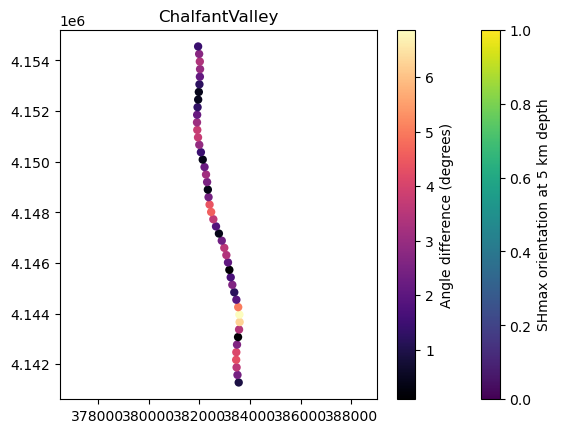

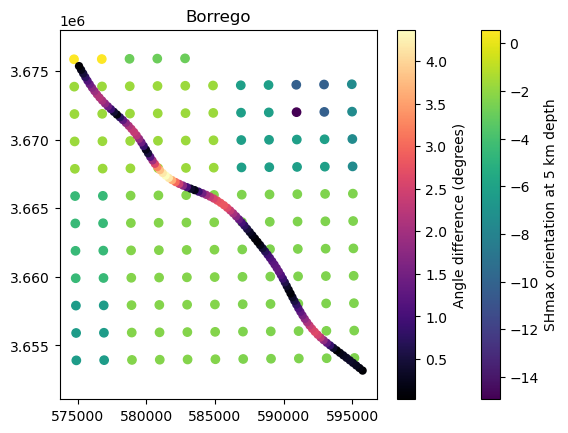

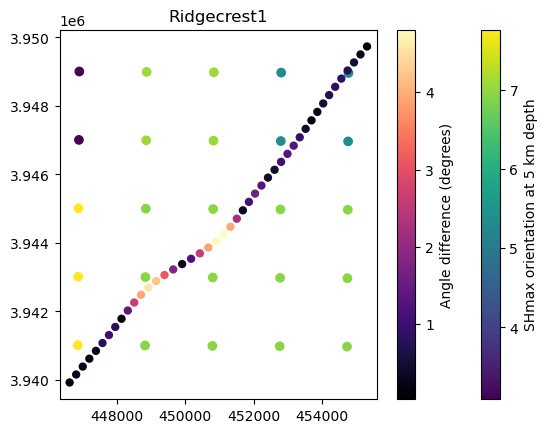

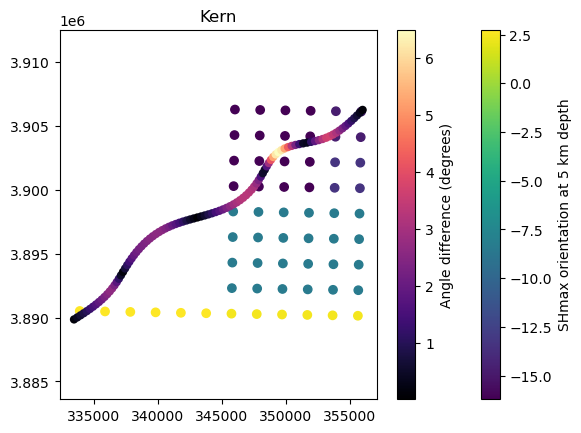

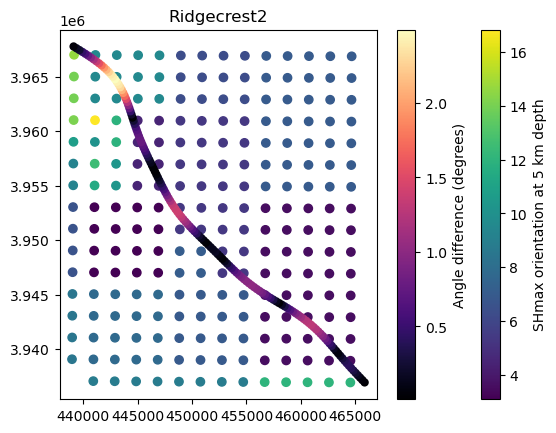

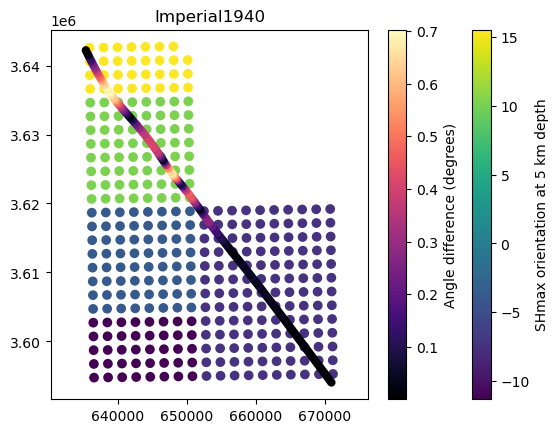

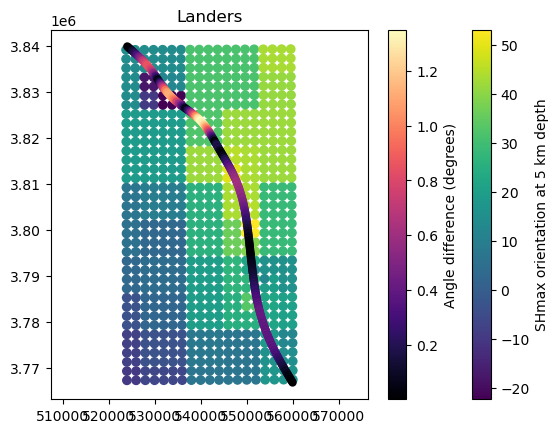

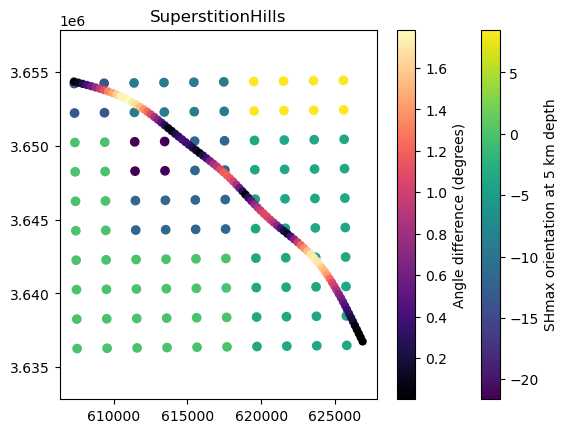

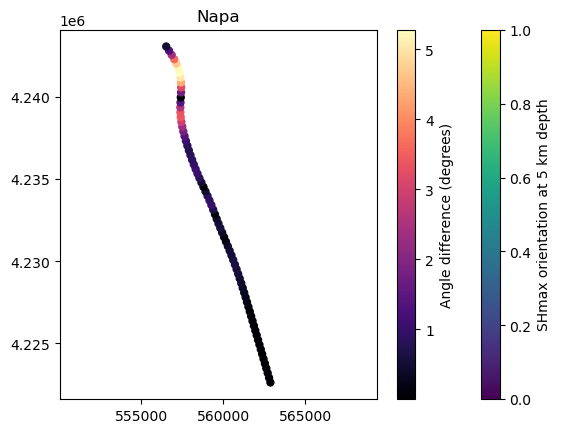

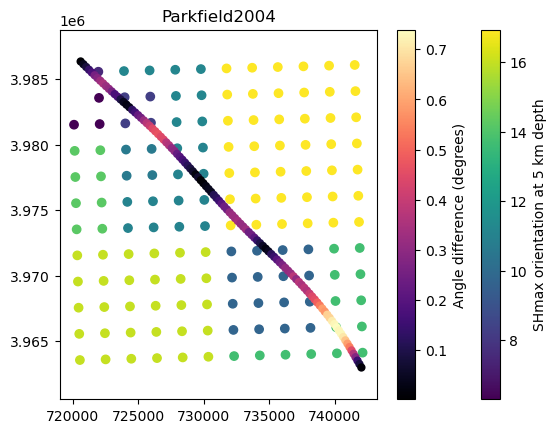

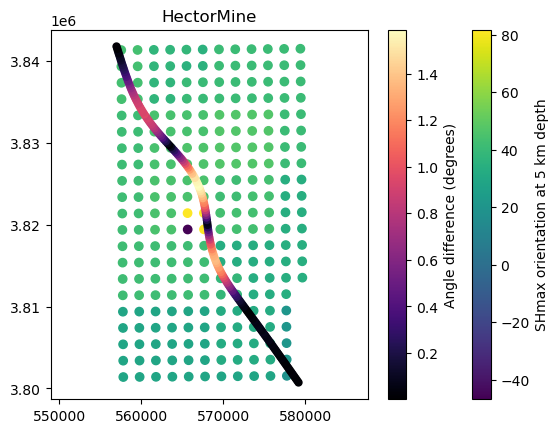

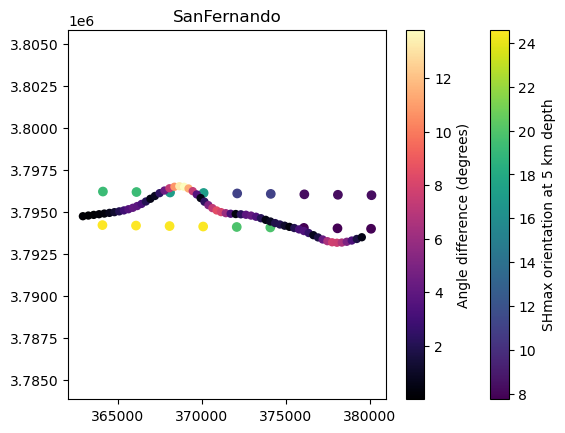

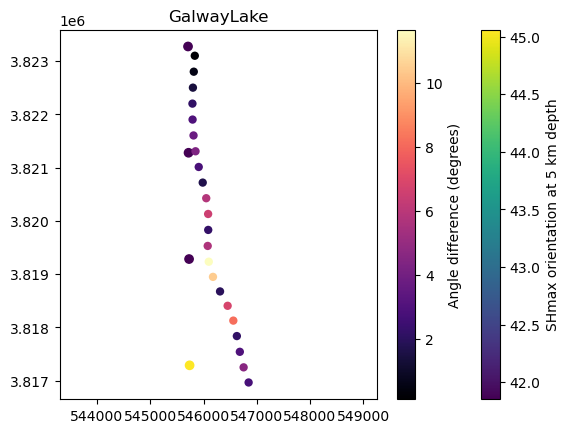

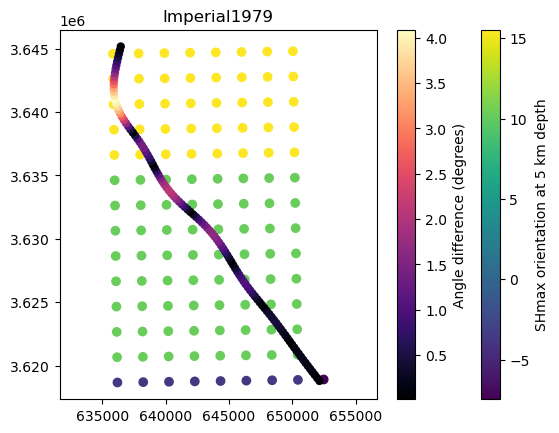

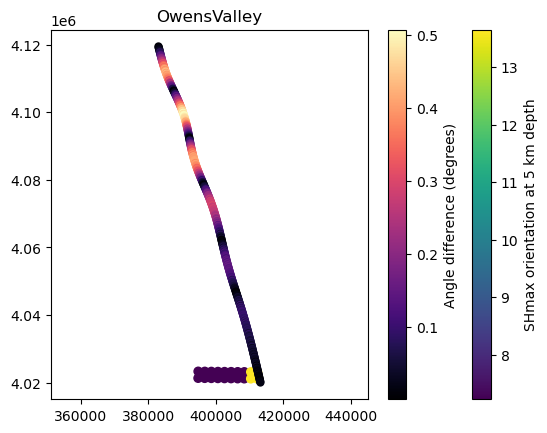

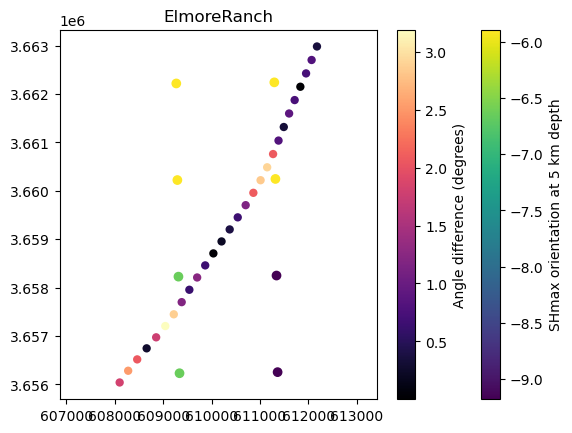

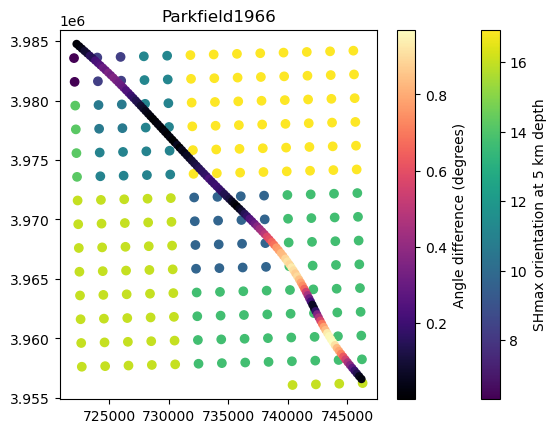

In [157]:

# Directory containing the shapefiles
shapefile_directory = "ECS_lines_CA/"

# Assuming 'CA_event_data' DataFrame contains event and zone information
CA_event_data['Zone_numeric'] = CA_event_data['zone'].str[:-1]

# Get a list of all shapefile paths in the directory
shapefile_paths = [os.path.join(shapefile_directory, file) for file in os.listdir(shapefile_directory) if file.endswith('.shp')]

for i, shapefile_path in enumerate(shapefile_paths):
    parts = shapefile_path.rsplit('/', 1)
    partsb = parts[1]
    partsb = str(partsb)
    split_parts = partsb.split('_ECS.shp')
    eventname = split_parts[0]
    matching_rows = CA_event_data[CA_event_data['event'] == eventname]
    target_utm_zone = matching_rows['Zone_numeric'].to_numpy()
    target_utm_zone = int(target_utm_zone[0])

    plt.figure()
    gdf = gpd.read_file(shapefile_path)
    gdf = gdf.set_crs('EPSG:4326')
    utm_crs = f"+proj=utm +zone={target_utm_zone} +ellps=WGS84 +datum=WGS84 +units=m +no_defs"
    gdf_utm = gdf.to_crs(utm_crs)
    
    # Perform the coordinate transformation

    source_crs = 'EPSG:4326'
    transformer = pyproj.Transformer.from_crs(source_crs, utm_crs, always_xy=True)
    utm_coords = []
    lat_lon_points = [(lat, lon) for lat, lon in zip(ystress, xstress)]

    xstress_utm = []
    ystress_utm = []
    for lat, lon in lat_lon_points:
        utm_x, utm_y = transformer.transform(lon, lat)
        xstress_utm.append(utm_x)
        ystress_utm.append(utm_y)

    # Extract the x and y coordinates from the 'geometry' column
    x_coords = []
    y_coords = []

    counter = 0
    step = 3 # for downsampling

    for line in gdf_utm['geometry']:
        for point in line.coords:
            x, y = point
            if counter % step == 0:
                # Only save every 5th point
                x_coords.append(x)
                y_coords.append(y)
            counter += 1

    angles = []
    for i in range(1,len(x_coords)-1):
        p0 = [x_coords[i-1], y_coords[i-1]]
        p1 = [x_coords[i], y_coords[i]]
        p2 = [x_coords[i+1], y_coords[i+1]]
        angles.append(ang([p0,p1], [p1,p2]))

    # Calculate the angle of each line segment
    vmin = 0
    vmax = 6
    # Create a scatter plot of the extracted coordinates with colors based on angles in degrees
    x_range = [min(x_coords) - 300, max(x_coords) + 300]
    y_range = [min(y_coords) - 300, max(y_coords) + 300]

    # Initialize lists to store the cropped data
    cropped_xstress_utm = []
    cropped_ystress_utm = []
    cropped_SHmax = []

    # Crop xstress_utm, ystress_utm, and SHmax to the specified range while keeping the same size
    for x, y, shmax in zip(xstress_utm, ystress_utm, SHmax):
        if x_range[0] <= x <= x_range[1] and y_range[0] <= y <= y_range[1]:
            cropped_xstress_utm.append(x)
            cropped_ystress_utm.append(y)
            cropped_SHmax.append(shmax)

    plt.scatter(cropped_xstress_utm, cropped_ystress_utm, c=cropped_SHmax, cmap='viridis', marker='o')
    plt.colorbar(label='SHmax orientation at 5 km depth')
    plt.scatter(x_coords[1:-1], y_coords[1:-1], c=angles, cmap='magma', marker='o',  edgecolors='none')
    
    # Set the desired range for the colorbar
    plt.title(eventname)
    plt.axis('equal')
    plt.colorbar(label='Angle difference (degrees)')
    plt.show()
